<a href="https://colab.research.google.com/github/saraswat12/churn-by-dl/blob/main/Churn_by_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
"""

"import os\nos.environ['KAGGLE_CONFIG_DIR'] = '/content'\n"

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [ ]:
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first = True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(11, activation = 'relu', input_dim = 11))
model.add(Dense(11, activation = 'relu'))

model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 11)                132       
                                                                 
 dense_11 (Dense)            (None, 11)                132       
                                                                 
 dense_12 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train_scaled, Y_train, epochs=150, validation_split=0.2)

Epoch 1/150
200/200 [==============================] - 1s 3ms/step - loss: 0.4993 - accuracy: 0.7958 - val_loss: 0.4701 - val_accuracy: 0.7975
Epoch 2/150
200/200 [==============================] - 1s 3ms/step - loss: 0.4572 - accuracy: 0.7981 - val_loss: 0.4507 - val_accuracy: 0.8056
Epoch 3/150
200/200 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.8045 - val_loss: 0.4393 - val_accuracy: 0.8112
Epoch 4/150
200/200 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.8142 - val_loss: 0.4307 - val_accuracy: 0.8156
Epoch 5/150
200/200 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8216 - val_loss: 0.4204 - val_accuracy: 0.8206
Epoch 6/150
200/200 [==============================] - 1s 3ms/step - loss: 0.4091 - accuracy: 0.8284 - val_loss: 0.4107 - val_accuracy: 0.8244
Epoch 7/150
200/200 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8334 - val_loss: 0.4006 - val_accuracy: 0.8281

In [ ]:
model.layers[0].get_weights()

[array([[-1.64177064e-02, -9.28003341e-02, -1.01333037e-01,
          1.58750247e-02,  3.50681961e-01,  3.43042077e-03,
          3.38059589e-02,  3.95792909e-02, -1.68634444e-01,
         -1.95992932e-01, -1.35519668e-01],
        [ 4.35850978e-01,  1.29748189e+00,  1.50616527e+00,
         -8.04669410e-02,  7.79415667e-02,  4.85692441e-01,
         -5.49087860e-02, -8.48247051e-01, -6.16763830e-01,
         -2.79824346e-01,  4.27837044e-01],
        [ 2.81797405e-02,  5.05126156e-02,  1.66352928e-01,
          5.92913553e-02, -4.50399548e-01,  6.98179938e-05,
         -4.44568917e-02,  5.27197942e-02,  3.60757411e-01,
          1.33442014e-01,  3.34958255e-01],
        [ 2.17404723e-01, -2.38753378e-01, -1.21642463e-01,
         -8.09645057e-01, -7.36401305e-02,  4.24935743e-02,
         -9.71234739e-01, -4.29611474e-01, -1.18722439e-01,
          3.57581258e-01, -3.77026767e-01],
        [-1.24565434e+00, -6.11642189e-02,  1.31225392e-01,
         -8.98506880e-01,  1.72048613e-01,  

In [ ]:
model.layers[1].get_weights()

[array([[ 5.27043156e-02,  1.06939048e-01, -1.78089067e-01,
          5.46891093e-01,  3.08795154e-01, -2.93659985e-01,
         -3.69376063e-01, -8.98144722e-01,  8.54826927e-01,
         -4.90940809e-01, -3.40578884e-01],
        [ 1.37225866e-01, -1.48501545e-01,  2.80250669e-01,
         -7.21978903e-01,  6.95280850e-01, -5.53735316e-01,
         -3.67638469e-01,  2.99971372e-01,  6.09360754e-01,
          6.95389956e-02, -7.84278810e-01],
        [ 3.45272571e-01, -5.99414229e-01,  5.38823128e-01,
         -8.61388221e-02,  1.63441598e-01, -2.44038358e-01,
         -3.69634032e-01,  4.08938974e-01, -5.04513867e-02,
          9.28302646e-01,  5.61651051e-01],
        [-6.39137805e-01, -8.19589078e-01, -9.72885489e-01,
         -1.36866137e-01,  5.03948092e-01, -7.41288364e-01,
         -3.11411887e-01, -3.02385718e-01,  8.60020578e-01,
         -6.27455592e-01, -7.94239283e-01],
        [ 3.15245003e-01, -7.90098507e-04,  1.01445340e-01,
          7.64018595e-02,  1.11591287e-01,  

In [ ]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [ ]:
import numpy as np

In [ ]:
y_pred = np.where(y_log>0.5,1,0)

In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.8665

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
history

In [ ]:
history.history

{'loss': [0.4993148744106293,
  0.4572315514087677,
  0.4404044449329376,
  0.42863816022872925,
  0.41906121373176575,
  0.40907564759254456,
  0.40046364068984985,
  0.3911992013454437,
  0.38209620118141174,
  0.37286680936813354,
  0.36365145444869995,
  0.35710063576698303,
  0.35237041115760803,
  0.34739959239959717,
  0.34433525800704956,
  0.3412359356880188,
  0.3393884599208832,
  0.3375438451766968,
  0.3360404074192047,
  0.3351471722126007,
  0.3341996669769287,
  0.33290451765060425,
  0.33296287059783936,
  0.33197689056396484,
  0.3313694894313812,
  0.3306889235973358,
  0.33059075474739075,
  0.3300526738166809,
  0.3292543888092041,
  0.32862359285354614,
  0.3284774422645569,
  0.32814595103263855,
  0.3279590308666229,
  0.3273448646068573,
  0.32769882678985596,
  0.3270527124404907,
  0.32703185081481934,
  0.32691729068756104,
  0.32579153776168823,
  0.32595840096473694,
  0.3261443078517914,
  0.3258659243583679,
  0.3256119191646576,
  0.3255231976509094,
  

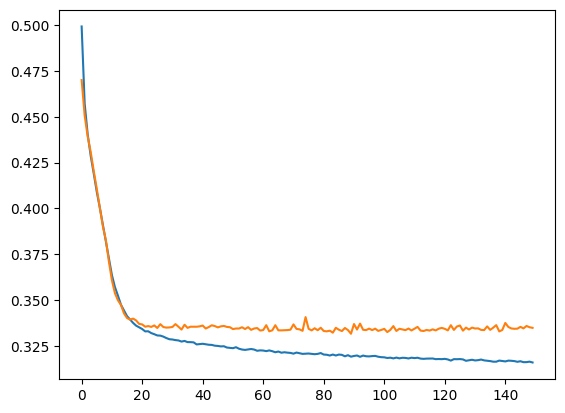

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

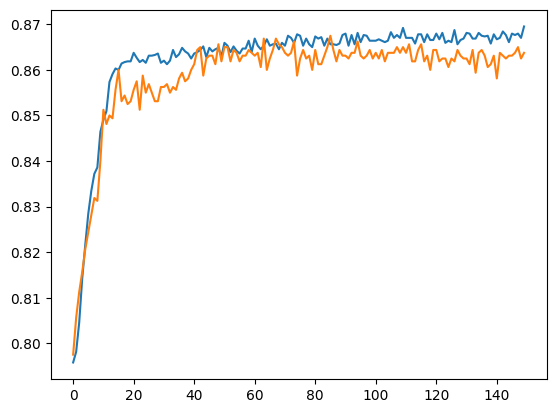

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])